In [3]:
from task_1_1_bpe import BPE

# Why Normalize ?
1. Consistency: ensure unform representation of text 
2. Reduced Vocabulary size
3. Reduce sparsity in the data
4. Normalize different representation of the same word

# What are the other options of normalization ?
1. **Case Folding:** Convert to uppercase / lowercase
2. **Unicode Normalization:** Handle Accented characters
3. **Number Normalization:** Replace numbers with a special token
4. **Punctuation Handling:** Remove or Standardize puntuation
5. **White Space Normalization:** Standardize spaces, tabs, newlines

In [ ]:
import unicodedata
import re

def normalize_text(text: str) -> str:
    # Convert to lowercase
    text = text.lower()
    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    # Remove special characters (keep alphanumeric and basic punctuation)
    text = re.sub(r'[^a-z0-9\s.,!?]', '', text)
    # Normalize whitespace
    text = ' '.join(text.split())
    return text

# Why we are using GPT2 tokenizer ?
- **Pre-trained Subword Units:** Handle wide range of Vocabulary
- **Handles Unknown Words:** Uses byte-level BPE for better OOV handling
- **Efficient Implementation:** Optimized for performance
- **Standardized:** Consistent tokenization across different models

# How it is handling unseen tokens ?
1. Character-level Fallback: Decomposes unknown words into known subwords
2. Byte-level Encoding: Represents any character sequence
3. Merge Operations: Applies learned merge rules

- Small Dataset: 50-100 lines of poetry (for quick experimentation)
- Medium Dataset: 10,000 lines from Project Gutenberg (for meaningful patterns)
- Large Dataset: Full 3M lines (for production-quality training)


In [15]:
# %pip install datasets

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
Using cached multiprocess-0.70.16-py312-none-any.whl (146 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl (26.1 MB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 5.3 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from datasets import load_dataset

ds = load_dataset("biglam/gutenberg-poetry-corpus")

c:\Users\praty\Desktop\GSoc\Notes on LM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\praty\Desktop\GSoc\Notes on LM\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\praty\.cache\huggingface\hub\datasets--biglam--gutenberg-poetry-corpus. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administr

In [42]:
corpus = ds['train']['line'][:100]

In [43]:
corpus

['The Song of Hiawatha is based on the legends and stories of',
 'many North American Indian tribes, but especially those of the',
 'Ojibway Indians of northern Michigan, Wisconsin, and Minnesota.',
 'They were collected by Henry Rowe Schoolcraft, the reknowned',
 'Schoolcraft married Jane, O-bah-bahm-wawa-ge-zhe-go-qua (The',
 'fur trader, and O-shau-gus-coday-way-qua (The Woman of the Green',
 'Prairie), who was a daughter of Waub-o-jeeg (The White Fisher),',
 'who was Chief of the Ojibway tribe at La Pointe, Wisconsin.',
 'Jane and her mother are credited with having researched,',
 'authenticated, and compiled much of the material Schoolcraft',
 'included in his Algic Researches (1839) and a revision published',
 'in 1856 as The Myth of Hiawatha.  It was this latter revision',
 'that Longfellow used as the basis for The Song of Hiawatha.',
 'Longfellow began Hiawatha on June 25, 1854, he completed it',
 'soon as the poem was  published its popularity was assured.',
 'However, it als

In [44]:
bpe = BPE(vocab_size=500, corpus=corpus)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [56]:
bpe.get_vocab()[45:50]

['z', 'Ġ', 'th', 'the', 'Ġthe']

In [58]:
unknown_word = "supercalifragilisticexpialidocious"
unknown_word in bpe.get_vocab()

False

In [59]:
bpe.tokenize("supercalifragilisticexpialidocious")

['s',
 'u',
 'p',
 'er',
 'c',
 'al',
 'i',
 'f',
 'ra',
 'g',
 'i',
 'l',
 'is',
 't',
 'ic',
 'e',
 'x',
 'p',
 'i',
 'al',
 'i',
 'd',
 'o',
 'c',
 'i',
 'ou',
 's']

In [60]:
bpe = BPE(vocab_size=5000, corpus=corpus)
bpe.tokenize("supercalifragilisticexpialidocious")

['s',
 'u',
 'p',
 'er',
 'c',
 'al',
 'if',
 'ra',
 'g',
 'i',
 'l',
 'is',
 't',
 'ic',
 'e',
 'x',
 'p',
 'i',
 'al',
 'i',
 'd',
 'o',
 'c',
 'i',
 'ou',
 's']

1. For a small vocabulary (50): This is expected behavior. With a small vocabulary, BPE will break down long words into smaller subword units.
2. For a larger vocabulary (5000): This might indicate that:
    - Our corpus doesn't contain enough examples of long words
    - The vocabulary size is still too small for the complexity of our language
    - The training data doesn't include similar word patterns

In [61]:
# let's increase the vocabulary size to 10000
bpe = BPE(vocab_size=10000, corpus=corpus)
bpe.tokenize("supercalifragilisticexpialidocious")


['s',
 'u',
 'p',
 'er',
 'c',
 'al',
 'if',
 'ra',
 'g',
 'i',
 'l',
 'is',
 't',
 'ic',
 'e',
 'x',
 'p',
 'i',
 'al',
 'i',
 'd',
 'o',
 'c',
 'i',
 'ou',
 's']

>A well trained BPE tokenizer with sufficient vocabulary size will give something like this     

['super', 'cali', 'frag', 'ilistic', 'exp', 'iali', 'doc', 'ious']

In [63]:
corpus = ds['train']['line'][:1000]

In [64]:
bpe = BPE(vocab_size=10000, corpus=corpus)

In [65]:
bpe.tokenize("supercalifragilisticexpialidocious")

['su',
 'per',
 'c',
 'al',
 'if',
 'rag',
 'il',
 'ist',
 'ice',
 'x',
 'p',
 'i',
 'al',
 'id',
 'o',
 'ci',
 'ous']

> slightly better but not there

In [66]:
corpus = ds['train']['line'][:10000] # we can extend it upto 3 million
bpe = BPE(vocab_size=20000, corpus=corpus)

In [67]:
bpe.tokenize("supercalifragilisticexpialidocious")

['super',
 'cal',
 'if',
 'rag',
 'il',
 'ist',
 'ice',
 'x',
 'p',
 'ial',
 'id',
 'o',
 'cious']

In [72]:
corpus = ds['train']['line'][:15000] # we can extend it upto 3 million
bpe = BPE(vocab_size=30000, corpus=corpus)

In [73]:
bpe.tokenize("supercalifragilisticexpialidocious")

['super',
 'cal',
 'if',
 'rag',
 'il',
 'ist',
 'ice',
 'x',
 'p',
 'ial',
 'id',
 'oc',
 'ious']

> Little Close

# How to decide the Vocabulary Size ?
- Corpus Size: Larger corpus may need larger vocabulary
- Language Characteristics: Morphologically rich languages need larger vocabs
- Domain-Specific Terms: Technical domains may require specialized tokens
- Computational Resources: Larger vocabs require more memory and compute    
# Rule of Thumb
- Small dataset (1M tokens): 5K-10K
- Medium dataset (100M tokens): 30K-50K
- Large dataset (1B+ tokens): 50K-100K

In [ ]:
# When initializing BPE
bpe = BPE(
    vocab_size=5000,  # Adjust based on your needs
    corpus=your_corpus
)

# Why we are calculating frequencies ?
1. to identify Most frequent character/ word pair
2. Focus on most useful tokens
3. Guides which pairs to merge first
4. More frequent pairs merged first for better compression

In [ ]:
word_freqs = {
    "hello": 10,
    "world": 5,
    "test": 3
}
# The pair 'he' in 'hello' gets frequency 10
# The pair 'or' in 'world' gets frequency 5

# Vizualizing the process

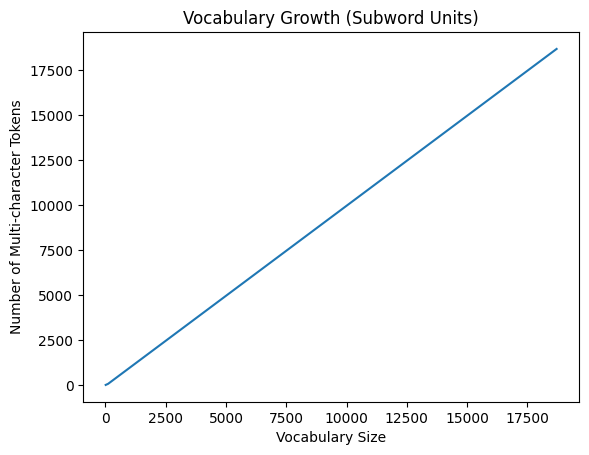

In [102]:
import matplotlib.pyplot as plt

def plot_vocab_growth(bpe):
    sizes = []
    for i in range(10, len(bpe.vocab), 100):
        sizes.append((i, len([t for t in bpe.vocab[:i] if len(t) > 1])))
    
    x, y = zip(*sizes)
    plt.plot(x, y)
    plt.title("Vocabulary Growth (Subword Units)")
    plt.xlabel("Vocabulary Size")
    plt.ylabel("Number of Multi-character Tokens")
    plt.show()

plot_vocab_growth(bpe)

# Common Pitfalls
1. Over-normalization: Losing important distinctions
2. Under-normalization: Too many unique tokens
3. Memory Issues: With very large vocabularies
4. Special Tokens: Forgetting to handle special cases (URLs, emails, etc.)
5. Performance: Slow tokenization on large texts

# Next Steps
1. Experiment with different vocabulary sizes
2. Compare performance with/without normalization
3. Try different tokenization strategies
4. Benchmark against other tokenizers
5. Implement custom merge rules for domain-specific terms

# What are the cons of BPE ?
1. Loss of Word Boundaries
    - Merges characters/subwords without considering linguistic meaning
        - May split words in unintuitive ways (e.g., "unhappiness" → ["un", "happiness"])
2. Fixed Vocabulary Size
    - Requires pre-defining vocabulary size (e.g., 32K tokens)
        - Suboptimal for handling rare or domain-specific terms
        - Adding new terms requires retraining the entire tokenizer
3. Inefficient for Some Languages
    - Works best for space-delimited languages like English
    - Less effective for:
        - Agglutinative languages (e.g., Turkish, Finnish)
        - Character-based languages (e.g., Chinese, Japanese)
        - Highly inflected languages
4. Context Insensitivity
    - Same word can have different tokenizations based on frequency
        - No understanding of word meaning or context
        - Example: "bank" in "river bank" vs. "bank account" gets same tokenization
5. Suboptimal for Rare Words
    - Long, rare words get broken into many subword units
        - Increases sequence length unnecessarily
        - Example: "supercalifragilisticexpialidocious" → multiple subword tokens
6. Training Data Dependency
    - Tokenization quality heavily depends on training corpus
        - May not generalize well to different domains
        - Requires retraining for specialized vocabularies
7. Computational Overhead
    - Training can be resource-intensive for large corpora
        - Inference requires multiple merge operations
        - More complex than simple word or character tokenization
8. Handling of Numbers and Special Characters
    - Often splits numbers into individual digits
        - May not handle special characters consistently
        - Example: "123-456-7890" → ["1", "2", "3", "-", "4", "5", "6", "-", "7", "8", "9", "0"]
9. No Morphological Understanding
    - Doesn't understand word roots, prefixes, or suffixes
        - May not capture meaningful subword units for all languages
        - Example: "unhappiness" → ["un", "happiness"] instead of ["un", "happy", "ness"]
10. Fixed Vocabulary at Inference
    - Cannot dynamically add new words without retraining
        - All OOV (Out-Of-Vocabulary) words must be represented via subword units
        - May lead to suboptimal representations of new or rare terms   

    
Meanwhile other Tokenization Methods


| Aspect | BPE | Word-Level | Character-Level | WordPiece | SentencePiece |
|--------|-----|------------|-----------------|-----------|---------------|
| Handles OOV | ✓ (subwords) | ✗ | ✓ | ✓ (subwords) | ✓ (subwords) |
| Vocabulary Size | Medium | Large | Small | Medium | Medium |
| Sequence Length | Medium | Short | Long | Medium | Medium |
| Morphology | Limited | No | Yes | Limited | Better |
| Training Complexity | High | Low | Low | High | High |
| Common Use | GPT, BART | Older models | Char-RNN | BERT | T5, mT5 |




What we have not covered so far ?
1. Word Level with Transformations
2. Byte-level BPE
3. others

> Another question: Why different models need their own tokenizers ?

# When to use BPE
## 1. Good for:
- Large language models
- Multiple languages
- When you need a balance between word and character-level approaches

## 2. Consider Alternatives When:
- Working with morphologically rich languages
- Need to preserve word boundaries
- Limited computational resources
- Domain-specific terminology is crucial

# Mitigation Strategies
## 1. For rare words:
- Increase vocabulary size
- Add domain-specific terms to training data
- Use a hybrid approach with a dictionary
## 2. For morphologically rich languages:
- Consider morphological segmentation
- Use language-specific tokenizers before BPE
- Try SentencePiece with character coverage tuning
## 3. For domain adaptation:
- Continue training on domain-specific data
- Add domain-specific special tokens
- Fine-tune the tokenizer on your corpus

# What is MinBPE ?
## MinBPE: A Minimal, Clean Implementation of BPE
MinBPE is a simplified, educational implementation of Byte Pair Encoding (BPE) created by Andrej Karpathy. It's designed to be:

- Minimal: Focused on core BPE algorithm
- Readable: Clean, well-documented code
- Educational: Great for learning how BPE works
## Key Differences from Full BPE
- Simplicity:
    - No complex pre-tokenization
    - No special token handling
    - No subword regularization
- Performance:
    - Not optimized for speed
    - Pure Python implementation
    - No parallel processing
- Features:
    - Basic vocabulary building
    - Simple merge operations
    - Byte-level encoding

# Merge algorithm in detail ?
1. Get the Most Frequent Pair of Tokens
2. Merge the Most Frequent Pair of Tokens
3. Update the vocabulary and frequencies
4. Repeat until the vocabulary size is reached

## Key insights
1. Frequency-Based: Always merges most frequent pairs first
2. Greedy: Makes locally optimal choice at each step
3. Deterministic: Same corpus → same merges
4. Order Matters: Early merges affect later ones

# Where i might have gone possibly wrong ?
1. Vocabulary Size vs. Corpus Size
    - Small corpus with large vocab → Many rare tokens
    - Large vocab on small data → Overfitting to training data

2. Merge Operations
    - Not handling whitespace properly
    - Incorrect pair frequency updates
    - Not preserving word boundaries

3. Edge Cases
    - Empty strings
    - Numbers and special characters
    - Unicode characters


# What could have improved ?
## Code Quality
    1. Error Handling
    2. Performance
        - Use more efficient data structures
        - Add batch processing for large corpora
        - Implement caching for frequent operations
    3. Testing
        - Add unit tests for key functions
        - Include edge case testing
        - Add integration tests with real data

# Next Plans
1. Adding Sepcial tokens
2. Implement Save/ Load
3. pre_tokenization
4. Subword Regularization
5. Byte-level Fallback
6. Vocabulary Pruning

### Can we conclude that we can have a useful huge vocabulary from a small corpus ? if yes, then why we will have a large corpus ?
## Small Corpus Challenges
    - Limited word variety
    - Poor generalization
    - Unreliable frequency counts
## Why Large Corpus Matters
- Better Statistics
    - More accurate frequency counts
    - Better merge decisions
- Rare Words
    - More examples of rare patterns
    - Better handling of edge cases
- Contextual Understanding
    - Learn domain-specific terms
    - Better handling of polysemy